# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [18]:
# your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
#Load data
df= pd.read_excel('Online Retail.xlsx',sheet_name='Online Retail',engine='openpyxl')



***Let us now clean our data by taking out completely non-conforming rows***

In [19]:
#take out missing values and unimportant columns
df.dropna(how='any',inplace=True)
df.drop(['InvoiceNo'],axis=1,inplace=True)



***Also, let us attempt to split our time and date and redesign some data types***

In [20]:
df['Invoice_date'] = [d.date() for d in df['InvoiceDate']]
df['Invoice_time'] = [d.time() for d in df['InvoiceDate']]
df['Invoice_date']= df['Invoice_date'].astype('datetime64[ns]')
df['CustomerID']= df['CustomerID'].astype('str')
df['Year'] = df['Invoice_date'].dt.year 
df['Month'] = df['Invoice_date'].dt.month 
#now we assign the month names
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df['Weekday'] = df['InvoiceDate'].dt.day_name()

#Alternative ways for day of week
#df['day_of_week'] = df['my_dates'].dt.dayofweek

#days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

#df['day_of_week'] = df['day_of_week'].apply(lambda x: days[x])
df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_date,Invoice_time,Year,Month,Weekday
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,Dec,Wednesday
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,Dec,Wednesday
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,2010,Dec,Wednesday
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,Dec,Wednesday
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,Dec,Wednesday


**Now let us look at our top customers**


***First, our top 7 spenders!***

In [21]:
df_group_one = df[['CustomerID','UnitPrice','Quantity']]
groupagg=df_group_one.groupby(['CustomerID']).agg({'UnitPrice': ['sum', 'count','mean']})
top_spenders=groupagg.sort_values(by=('UnitPrice','sum'),ascending=False)
top_spenders.head(7)
#df_group_one.head()

UnitPrice                   
                 sum count         mean
CustomerID                             
14096.0     41376.33  5128     8.068707
15098.0     40278.90     5  8055.780000
14911.0     31060.66  5903     5.261843
12744.0     25108.89   229   109.645808
16029.0     24111.14   274    87.996861
17841.0     20333.18  7983     2.547060
12748.0     15115.60  4642     3.256269

***A little more graphic please..***

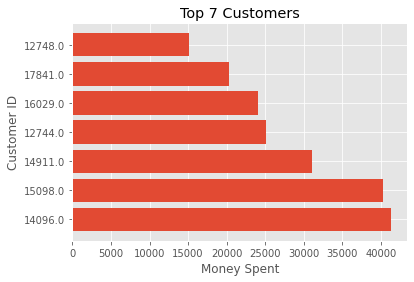

In [22]:
groupagg=df_group_one.groupby(['CustomerID']).agg({'UnitPrice': ['sum']})
top_spenders=groupagg.sort_values(by=('UnitPrice','sum'),ascending=False)
top_spenders=top_spenders.head(7)

#Unpivot the columns
res_top = top_spenders.reset_index()
res_wide_top=res_top.melt(id_vars='CustomerID')
res_wide_top=res_wide_top.drop(['variable_0','variable_1'],axis=1)
res_wide_top.rename(columns = {'value':'Money_Spent'}, inplace = True)

#display dataframe
#res_wide_top
#plotting the graph

plt.style.use('ggplot')
plt.barh(res_wide_top['CustomerID'], res_wide_top['Money_Spent'])

# setting label of y-axis
plt.ylabel("Customer ID")

# setting label of x-axis
plt.xlabel("Money Spent")
plt.title("Top 7 Customers")
plt.show()

***but are they?***

In [24]:
df_group_one = df[['CustomerID','UnitPrice','Quantity']]
groupagg=df_group_one.groupby(['CustomerID']).agg({'UnitPrice': ['sum', 'count','mean']})
top_spenders=groupagg.sort_values(by=('UnitPrice','mean'),ascending=False)
top_spenders.head(7)
#df_group_one.head()

UnitPrice               
                 sum count     mean
CustomerID                         
15098.0     40278.90     5  8055.78
17448.0      4287.63     1  4287.63
17846.0      2033.10     1  2033.10
15369.0      1592.49     1  1592.49
12503.0      1126.00     1  1126.00
13154.0       611.86     1   611.86
15802.0      1354.26     3   451.42

Text(0, 0.5, 'Customer ID')

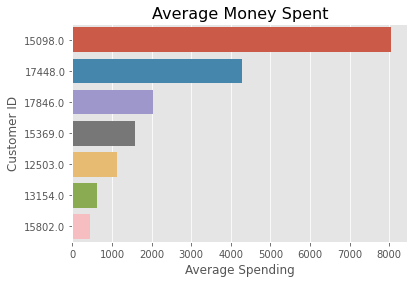

In [25]:
groupagg=df_group_one.groupby(['CustomerID']).agg({'UnitPrice': ['mean']})
top_spendersm=groupagg.sort_values(by=('UnitPrice','mean'),ascending=False)
top_spendersm=top_spendersm.head(7)

#Unpivot the columns
res_topm = top_spendersm.reset_index()
res_wide_topm=res_topm.melt(id_vars='CustomerID')
res_wide_topm=res_wide_topm.drop(['variable_0','variable_1'],axis=1)
res_wide_topm.rename(columns = {'value':'Average_Money_Spent'}, inplace = True)

#display dataframe
res_wide_topm



#plotting the graph

sns.barplot(x=res_wide_topm.Average_Money_Spent,y=res_wide_topm.CustomerID, orient='h')

#add plot title
plt.title('Average Money Spent', fontsize=16)

#add axis labels
plt.xlabel('Average Spending')
plt.ylabel('Customer ID')


***Then, our top 7 buyers***

In [26]:
groupagg1=df_group_one.groupby(['CustomerID']).agg({'Quantity': ['sum','count','mean']})
top_buyers=groupagg1.sort_values(by=('Quantity','sum'),ascending=False)
top_buyers.head(7)

Quantity                  
                sum count        mean
CustomerID                           
14646.0      196719  2085   94.349640
12415.0       77242   778   99.282776
14911.0       77180  5903   13.074708
17450.0       69029   351  196.663818
18102.0       64122   433  148.087760
17511.0       63012  1076   58.561338
13694.0       61803   585  105.646154

***Some graphics...***

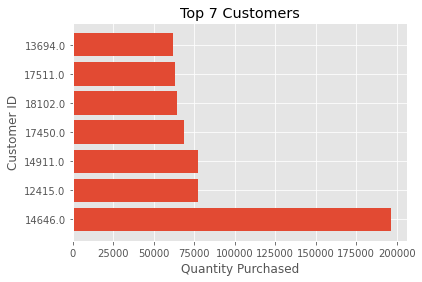

In [27]:
groupagg1=df_group_one.groupby(['CustomerID']).agg({'Quantity': ['sum']})
top_buyers=groupagg1.sort_values(by=('Quantity','sum'),ascending=False)
top_buyers=top_buyers.head(7)
#Unpivot the columns
res_topb = top_buyers.reset_index()
res_wide_topb=res_topb.melt(id_vars='CustomerID')
res_wide_topb=res_wide_topb.drop(['variable_0','variable_1'],axis=1)
res_wide_topb.rename(columns = {'value':'Quantity_Bought'}, inplace = True)

#display dataframe
#res_wide_topb
#plotting the graph
plt.style.use('ggplot')
plt.barh(res_wide_topb['CustomerID'], res_wide_topb['Quantity_Bought'])

# setting label of y-axis
plt.ylabel("Customer ID")

# setting label of x-axis
plt.xlabel("Quantity Purchased")
plt.title("Top 7 Customers")
plt.show()


***or so we thought...***

In [28]:
groupagg1=df_group_one.groupby(['CustomerID']).agg({'Quantity': ['sum','count','mean']})
top_buyers=groupagg1.sort_values(by=('Quantity','mean'),ascending=False)
top_buyers.head(7)

Quantity               
                sum count     mean
CustomerID                        
13256.0       12540     1  12540.0
13135.0        4300     1   4300.0
16754.0        4280     2   2140.0
16308.0        8000     4   2000.0
14609.0        7026     4   1756.5
15118.0        1440     1   1440.0
15195.0        1404     1   1404.0

Text(0, 0.5, 'Customer ID')

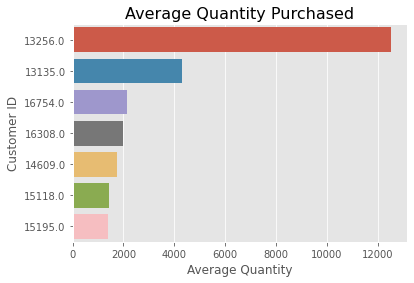

In [47]:
groupagg1=df_group_one.groupby(['CustomerID']).agg({'Quantity': ['mean']})
top_buyersm=groupagg1.sort_values(by=('Quantity','mean'),ascending=False)
top_buyersm=top_buyersm.head(7)

#Unpivotting columns
res_topbm = top_buyersm.reset_index()
res_wide_topbm=res_topbm.melt(id_vars='CustomerID')
res_wide_topbm=res_wide_topbm.drop(['variable_0','variable_1'],axis=1)
res_wide_topbm.rename(columns = {'value':'Average_Quantity'}, inplace = True)
#res_wide_topbm
#plotting the graph

sns.barplot(x=res_wide_topbm.Average_Quantity,y=res_wide_topbm.CustomerID, orient='h')

#add plot title
plt.title('Average Quantity Purchased', fontsize=16)

#add axis labels
plt.xlabel('Average Quantity')
plt.ylabel('Customer ID')



***By the metrics above, we seek to show total money spent by each customer, and total money spent on average by each customer.*** 
***Same with the quantity purchased. The question remains; would you a customer that buys frequently, or one who buys more on one visit?***

***We can also pinpoint which countries our top buyers and top spenders are...***


In [37]:
#df['Invoice_time']= df['Invoice_time'].astype('datetime64[ns]')

df.loc[df['CustomerID'] == '14096.0'].Country.head(1)


317502    United Kingdom
Name: Country, dtype: object

**Now let's do some Country analyses**

***Which products were customers from different countries buying?***

In [29]:
df_group2=df[['Country','Quantity','StockCode','Description']]
grouped = df_group2.groupby(['Country','Description'])['Quantity'].nlargest()
grouped.head(40)

Country    Description                               
Australia   DOLLY GIRL BEAKER                  304883    200
            I LOVE LONDON MINI BACKPACK        365447      4
           10 COLOUR SPACEBOY PEN              228210     48
           12 PENCIL SMALL TUBE WOODLAND       90226     384
           12 PENCILS TALL TUBE POSY           228198    240
                                               132289     12
           12 PENCILS TALL TUBE RED RETROSPOT  132290     12
           16 PIECE CUTLERY SET PANTRY DESIGN  193909     24
           20 DOLLY PEGS RETROSPOT             17067      24
           3 HOOK HANGER MAGIC GARDEN          52281      12
           3 STRIPEY MICE FELTCRAFT            228200    120
                                               304946     80
                                               269611      1
                                               270094     -1
           3 TIER CAKE TIN GREEN AND CREAM     108021     32
           3 TIER CAKE TIN RED 

***So which country has the most purchases?***

In [30]:
df_group_can=df[['Country','Quantity','InvoiceDate']]
groupagg2=df_group_can.groupby(['Country']).agg({'Quantity': ['sum']})
sort_quan= groupagg2.sort_values(by=('Quantity','sum'), ascending=False).head(8)
sort_quan

,Quantity
,sum
Country,
United Kingdom,4008533
Netherlands,200128
EIRE,136329
Germany,117448
France,109848
Australia,83653
Sweden,35637
Switzerland,29778


***Outlier alert!!***
---
***Looks like customers from the UK far outnumber customers from other regions***

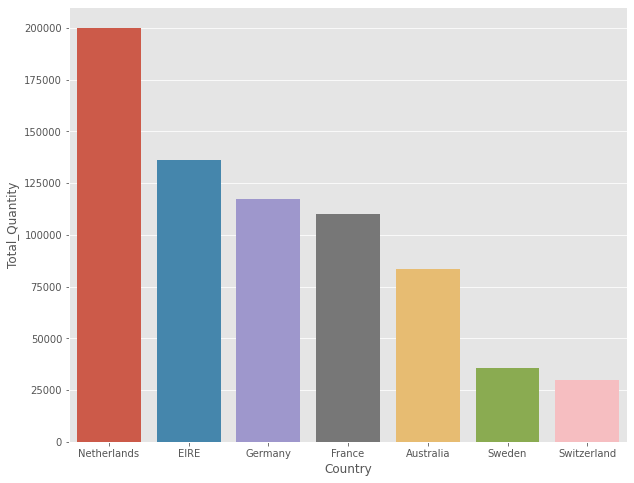

In [31]:

#We unpivot
res1 = sort_quan.reset_index()
res_wide1=res1.melt(id_vars='Country')
res_wide1=res_wide1.drop(['variable_0','variable_1'],axis=1)
res_wide1.rename(columns = {'value':'Total_Quantity'}, inplace = True)

#We take out the UK
res_wideC=res_wide1.drop(res_wide1.index[0])

#We display the result
#res_wideC

#then, we plot the graph

plt.figure(figsize=(10,8))
sns.barplot(x="Country", y="Total_Quantity",data=res_wideC)
plt.show()


**Then we find our topmost spending nation... drumroll...**

In [32]:
df_group_can=df[['Country','Quantity','InvoiceDate','UnitPrice']]
groupagg21=df_group_can.groupby(['Country']).agg({'UnitPrice': ['sum']})
sort_can=groupagg21.sort_values(by=('UnitPrice','sum'), ascending=False).head(9)
sort_can

,UnitPrice
,sum
Country,
United Kingdom,1178277.264
France,42871.240
EIRE,38253.580
Germany,37666.000
Singapore,25108.890
Portugal,12929.860
Spain,12633.450
Belgium,7540.130


***...add a little colour, and...***

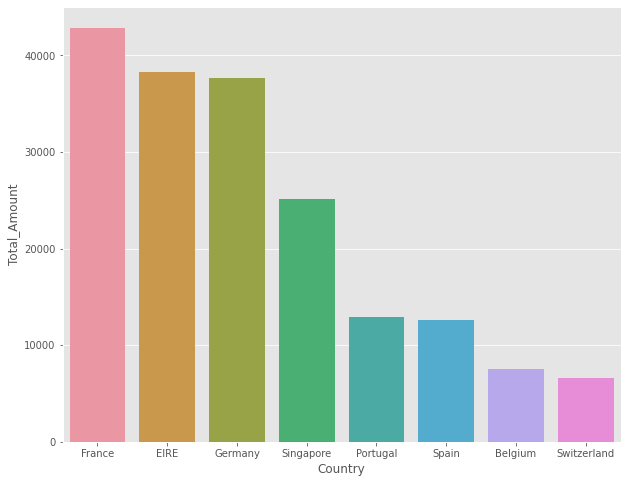

In [33]:
res = sort_can.reset_index()
res_wide=res.melt(id_vars='Country')
res_wide=res_wide.drop(['variable_0','variable_1'],axis=1)
res_wide.rename(columns = {'value':'Total_Amount'}, inplace = True)

#take out the outlier

res_wideB=res_wide.drop(res_wide1.index[0])
#res_wideB

#res_wideB

#Plotting the graph
plt.figure(figsize=(10,8))
sns.barplot(x="Country", y="Total_Amount",data=res_wideB)
plt.show()


**Now, we will want to track sales according to the days, months and years, and of course our top-selling products.**
---
***First, our best-selling product, in terms ofquantity sold.***

In [34]:
Salestime=df[['Invoice_date', 'Year','Quantity','Month','Description','UnitPrice']]
#Salestime
SalestimeStock=Salestime.groupby(['Description']).agg({'Quantity': ['sum']})
Stock=SalestimeStock.sort_values(by=('Quantity','sum'), ascending=False)
Stockbest=Stock.head(5)

#Unpivot
res_Stockbest = Stockbest.reset_index()
res_Stock_wide=res_Stockbest.melt(id_vars='Description')
res_Stock_wide=res_Stock_wide.drop(['variable_0','variable_1'],axis=1)
res_Stock_wide.rename(columns = {'value':'Total_Quantity'}, inplace = True)

res_Stock_wide



,Description,Total_Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1,JUMBO BAG RED RETROSPOT,45066
2,ASSORTED COLOUR BIRD ORNAMENT,35314
3,WHITE HANGING HEART T-LIGHT HOLDER,34147
4,PACK OF 72 RETROSPOT CAKE CASES,33409


***Let us get a donut chart to show us***

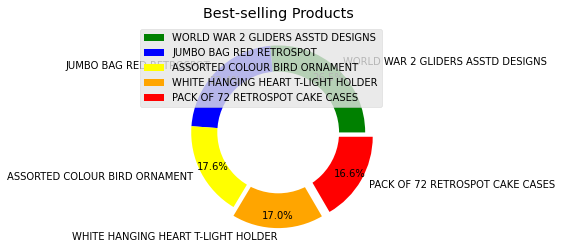

In [35]:

# Setting size in Chart based on
# given values
sizes = res_Stock_wide['Total_Quantity']


# Setting labels for items in Chart
labels = res_Stock_wide['Description']

# colors
colors = ['green', '#0000FF', '#FFFF00','#FFA500', '#FF0000']

# explosion
explode = (0.00,0.00,0.00,0.1,0.1)

# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
		autopct='%1.1f%%', pctdistance=0.85,
		explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Best-selling Products')

# Add Legends
plt.legend(labels, loc="upper right")

# Displaying Chart
plt.show()


***Let's get our busiest year***

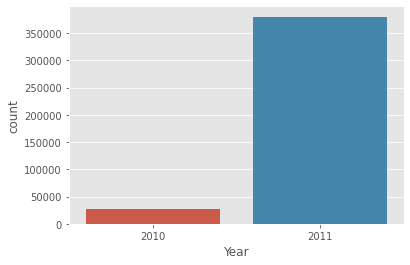

In [36]:
get_year=Salestime.groupby(Salestime['Year']).agg({'Quantity': ['sum']})
get_years=get_year.sort_values(by=('Quantity','sum'), ascending=False)
#get_years
res_Year = get_years.reset_index()
res_Year_wide=res_Year.melt(id_vars='Year')
res_Year_wide=res_Year_wide.drop(['variable_0','variable_1'],axis=1)
res_Year_wide.rename(columns = {'value':'Total_Quantity'}, inplace = True)
#res_Year_wide

#plotting
sns.countplot(x ='Year', data = Salestime)
# Show the plot
plt.show()


***Also, let's get our busiest months***

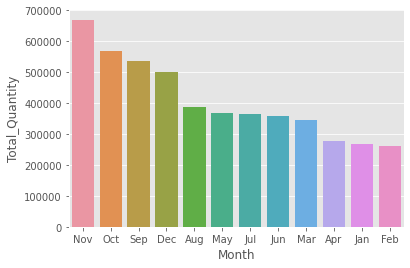

In [69]:

get_month=Salestime.groupby(Salestime['Month']).agg({'Quantity': ['sum']})
get_months=get_month.sort_values(by=('Quantity','sum'), ascending=False)
#get_months

res_month = get_months.reset_index()
res_month_wide=res_month.melt(id_vars='Month')
res_month_wide=res_month_wide.drop(['variable_0','variable_1'],axis=1)
res_month_wide.rename(columns = {'value':'Total_Quantity'}, inplace = True)

#res_month_wide

#plot the graph
sns.barplot(x = 'Month', y = 'Total_Quantity', data = res_month_wide)
# Show the plot
plt.show()





***And finally, our busiest days***

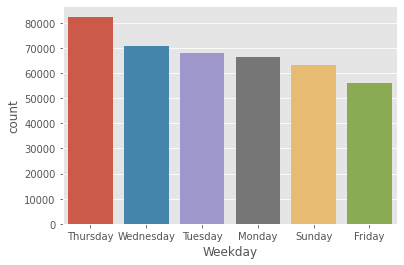

In [38]:
#plotting
sns.countplot(x ='Weekday', data = df, order=df['Weekday'].value_counts(ascending=False).index)
# Show the plot
plt.show()


**Can we therefore conclude that the level of products sold match the amount of monies received?**

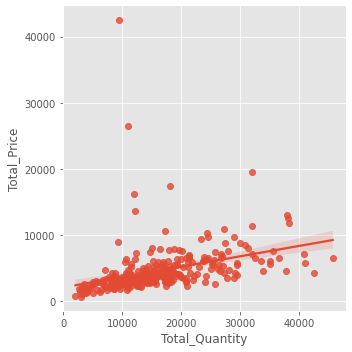

In [42]:
#Let's get our total amounts received

Salestimegroup=Salestime.groupby(['Invoice_date']).agg({'UnitPrice': ['sum']})
res_sales = Salestimegroup.reset_index()
res_sales_wide=res_sales.melt(id_vars='Invoice_date')
res_sales_wide=res_sales_wide.drop(['variable_0','variable_1'],axis=1)
res_sales_wide.rename(columns = {'value':'Total_Price'}, inplace = True)

#res_sales_wide

#And number of products sold
Salestimegroup1=Salestime.groupby(['Invoice_date']).agg({'Quantity':['sum']})
res_sales1 = Salestimegroup1.reset_index()
res_sales1_wide=res_sales1.melt(id_vars='Invoice_date')
res_sales1_wide=res_sales1_wide.drop(['variable_0','variable_1'],axis=1)
res_sales1_wide.rename(columns = {'value':'Total_Quantity'}, inplace = True)

#res_sales1_wide

#Let us put these together in a one dataframe

Sales=pd.merge(res_sales_wide,res_sales1_wide,on=['Invoice_date'])
#Sales

#And get our correlation plot
sns.lmplot(x ="Total_Quantity", y ="Total_Price",data = Sales);


**OBSERVATIONS FROM THE ANALYSES**
1. ***There are customers that purchase products more frequently than other customers, and there are ones who purchase in bulk but do not do so frequently.***
2. ***Both types are loyal customers and therefore should be encouraged with promos and/ or discounts.***
3. ***As with quantity, there are customers who spend more on the average than other customers. However, these are mostly linked to the type of products they need.***
4. ***The top-selling products should be available during peak months, like November and October, as well as peak days like Thursdays, Wednesdays, and Tuesdays.***
5. ***Apart from the UK, countries that record high sales should be encouraged to do so, while adopting measures to improve sales in countries like Belgium and Switzerland.***
6. ***Customers from different regions have products peculiar to them; for example customers from Australia were keen on purchasing products like the 12 PENCIL SMALL TUBE WOODLAND and the 12 PENCILS TALL TUBE POSY.***
7. ***The data shows that more products sold equals more income generated.*** 